<a href="https://colab.research.google.com/github/Amablie/LoftSchool/blob/main/Projetofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Classificação de filmes ganhadores do Oscar**

O problema escolhido para este projeto é sobre "Como classificar filmes ganhadores do Oscar?". Vamos utilizar o que foi aprendido durante o curso da Loft School em parceria com o Afropython

# Coleta  e carregamento de dados

Vamos juntar duas bases extraídas da plataforma de Data Science Kaggle. Uma com informações sobre filmes e a outra com informações sobre o Oscar. Para isso vamos começar importanto algumas bibliotecas para trabalhar com a nossa base e carregando-as no Google Colab.

In [ ]:
!pip install scikit-learn==0.23.2

     |████████████████████████████████| 6.8 MB 5.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

## Base de filmes

In [ ]:
dfMovies = pd.read_csv("/content/drive/My Drive/LoftSchool/MoviesOnStreamingPlatforms_updated.csv", sep = ',')

In [ ]:
dfMovies.head(3)

In [ ]:
dfMovies.tail(3)

## Base do Oscar

In [ ]:
dfOscar = pd.read_csv("/content/drive/My Drive/LoftSchool/the_oscar_award.csv", sep = ',')

In [ ]:
dfOscar.head(3)

In [ ]:
dfOscar.tail(3)

# **Preparação dos dados**





## Base do Oscar

In [ ]:
dfOscar.shape

(10395, 7)

In [ ]:
dfOscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10395 non-null  int64 
 1   year_ceremony  10395 non-null  int64 
 2   ceremony       10395 non-null  int64 
 3   category       10395 non-null  object
 4   name           10395 non-null  object
 5   film           10091 non-null  object
 6   winner         10395 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 497.5+ KB


Temos 7 variáveis:


*   year_film: ano de lançamento do filme
*   year_ceremony: ano da cerimônia
*   ceremony: edição da cerimônia
*   category: categoria indicada do oscar
*   name: nome das pessoas indicada na categoria
*   film: nome do filme
*   winner: vencedor do prêmio





In [ ]:
#RETORNA DADOS NULOS
dfOscar.isnull().sum()

year_film          0
year_ceremony      0
ceremony           0
category           0
name               0
film             304
winner             0
dtype: int64

In [ ]:
Nan = dfOscar[dfOscar.isnull().any(axis=1)]

In [ ]:
Nan['category'].unique()

array(['ENGINEERING EFFECTS', 'WRITING (Title Writing)', 'SPECIAL AWARD',
       'SOUND RECORDING', 'ASSISTANT DIRECTOR',
       'IRVING G. THALBERG MEMORIAL AWARD',
       'SPECIAL FOREIGN LANGUAGE FILM AWARD',
       'HONORARY FOREIGN LANGUAGE FILM AWARD', 'HONORARY AWARD',
       'JEAN HERSHOLT HUMANITARIAN AWARD', 'SPECIAL ACHIEVEMENT AWARD'],
      dtype=object)

In [ ]:
 df_null = dfOscar[dfOscar["film"].isnull()]
 df_null["category"].value_counts()


HONORARY AWARD                          124
SPECIAL AWARD                            56
IRVING G. THALBERG MEMORIAL AWARD        45
JEAN HERSHOLT HUMANITARIAN AWARD         39
ASSISTANT DIRECTOR                       18
SOUND RECORDING                           8
HONORARY FOREIGN LANGUAGE FILM AWARD      5
SPECIAL ACHIEVEMENT AWARD                 3
ENGINEERING EFFECTS                       2
SPECIAL FOREIGN LANGUAGE FILM AWARD       2
WRITING (Title Writing)                   2
Name: category, dtype: int64

<Figure size 2160x720 with 0 Axes>

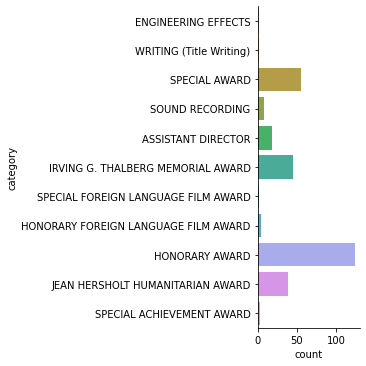

In [ ]:
plt.figure(figsize=(30,10))
sns.catplot(y= "category", kind = "count", data= df_null)

Acima notamos que apenas a coluna film possui dados nulos, analisando a base podemos notar que a maioria dos que não tem dados sobre os filmes são categorias especiais do Oscar que premiam atores/ diretores/ produtores pela contribuição deles para a história do cinema e não necessariamente por um filme produzido. Como por exemplo Walt Disney que ganhou um prêmio pela criação do Mickey Mouse e Spike Lee por ser um campeão em filmes independentes e uma inspiração para jovens cineastas. 


In [ ]:
 dfOscar.loc[dfOscar["category"]== "HONORARY AWARD"]

,year_film,year_ceremony,ceremony,category,name,film,winner
2506,1950,1951,23,HONORARY AWARD,George Murphy for his services in interpretin...,NaN,True
2507,1950,1951,23,HONORARY AWARD,Louis B. Mayer for distinguished service to t...,NaN,True
2625,1951,1952,24,HONORARY AWARD,Gene Kelly in appreciation of his versatility...,NaN,True
2750,1952,1953,25,HONORARY AWARD,George Alfred Mitchell for the design and dev...,NaN,True
2751,1952,1953,25,HONORARY AWARD,Joseph M. Schenck for long and distinguished ...,NaN,True
...,...,...,...,...,...,...,...
10264,2018,2019,91,HONORARY AWARD,Lalo Schifrin,NaN,True
10265,2018,2019,91,HONORARY AWARD,Cicely Tyson,NaN,True
10392,2019,2020,92,HONORARY AWARD,David Lynch,NaN,True
10393,2019,2020,92,HONORARY AWARD,Wes Studi,NaN,True


Como o premio não é por nenhum filme especifico não há problema em tirar essas informações da nossa base.


In [ ]:
#REMOVE TODAS AS LINHAS CUJO FILM ESTÁ IGUAL A NaN
dfOscar.dropna(inplace=True)

In [ ]:
dfOscar.shape

(10091, 7)

In [ ]:
dfOscar.head(3)

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False


In [ ]:
dfOscar = dfOscar[['film','year_film','year_ceremony','ceremony', 'category','name','winner']]

In [ ]:
dfOscar.head()

,film,year_film,year_ceremony,ceremony,category,name,winner
0,The Noose,1927,1928,1,ACTOR,Richard Barthelmess,False
1,The Last Command,1927,1928,1,ACTOR,Emil Jannings,True
2,A Ship Comes In,1927,1928,1,ACTRESS,Louise Dresser,False
3,7th Heaven,1927,1928,1,ACTRESS,Janet Gaynor,True
4,Sadie Thompson,1927,1928,1,ACTRESS,Gloria Swanson,False


## EDA Oscar


In [ ]:
winner= dfOscar["winner"].value_counts()
winner

False    8038
True     2357
Name: winner, dtype: int64

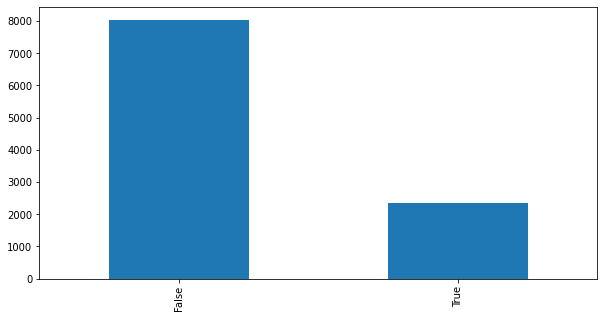

In [ ]:
plt.figure(figsize=(10,5))
winner.plot(kind = "bar")
plt.show()

In [ ]:
win = dfOscar[dfOscar["winner"]==True]
win.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
9,1927,1928,1,CINEMATOGRAPHY,Charles Rosher,Sunrise,True
10,1927,1928,1,CINEMATOGRAPHY,Karl Struss,Sunrise,True


In [ ]:
win["film"].value_counts()

Titanic                                          12
The Lord of the Rings: The Return of the King    11
Ben-Hur                                          11
West Side Story                                  10
The Last Emperor                                  9
                                                 ..
Dead Poets Society                                1
Dangerous                                         1
The Cowboy and the Lady                           1
Elizabeth: The Golden Age                         1
Bullets over Broadway                             1
Name: film, Length: 1273, dtype: int64

## Base de filmes

In [ ]:
dfMovies.shape

(16744, 17)

In [ ]:
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

Temos 17 variáveis:

* Unnamed: 0
* ID: Identificação do filme
* Title : Titulo do filme
* Year : Ano de lançamento do filme
* Age : Classificação indicativa do filme
* IMDb : Nota no IMDb
* Rotten Tomatoes : Nota no Rotten Tomatoes
* Netflix : Filmes presentes na Netflix
* Hulu : Filmes presentes na Hulu
* Prime Video : Filmes presentes na Prime Video
* Disney+ : Filmes presentes na Disney+
* Type: Tipo filme
* Directors : Diretor do filme
* Genres : Genero do Filme
* Country  : Pais de origem do filme
* Language : Idioma do filme
* Runtime : Tempo te duração







"Unnamed: 0" é uma coluna que com informações sobre as linhas que o python já trás naturalmente, então não vai ser muito util para nossa análise. Assim como o "ID" que mais pra frente com o cruzamento das duas basesnão terá muito sentido.



In [ ]:
dfMovies.drop(columns=["Unnamed: 0", 'ID'],inplace= True)

In [ ]:
dfMovies.isnull().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [ ]:
import missingno as msno

<function matplotlib.pyplot.show>

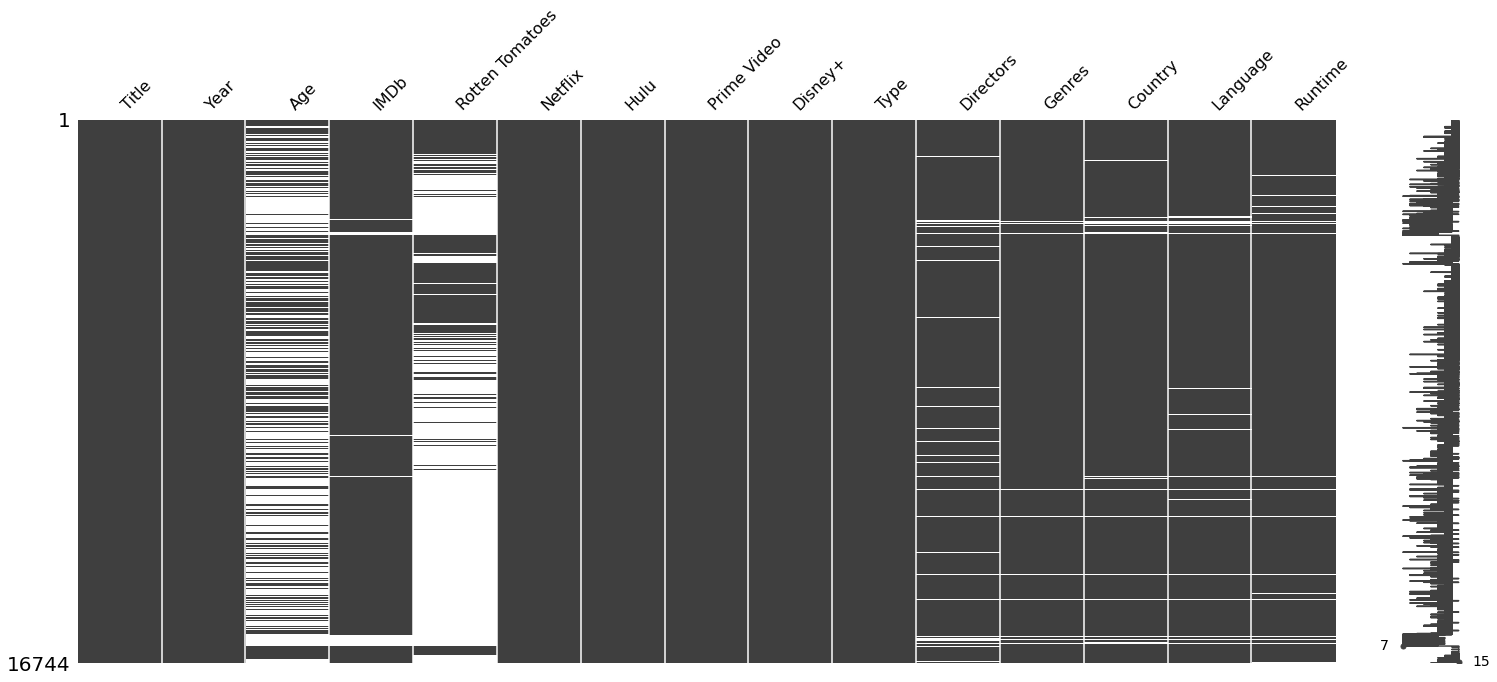

In [ ]:
msno.matrix(dfMovies)
plt.show

Com o gráfico acima podemos notar que a coluna Rotten Tomatoes possui muitos dados faltando, então ela não será muito proveitosa para a nossa análise

In [ ]:
#removendo coluna "Rotten Tomatoes"
dfMovies.drop(columns=["Rotten Tomatoes"],inplace= True)

In [ ]:
#renomeando coluna
dfMovies.rename(columns={"Title": "film"}, inplace= True)

In [ ]:
dfMovies.head()

,film,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


## Unindo dataframes


Para juntar nossas bases precisamos definir qual vai ser a coluna chave. Como o objetivo desse projeto é criar um modelo que classificação para filmes ganhadores do Oscar nossa coluna chave será "film" e "year".

In [ ]:
#juntando as bases
df = pd.merge(dfOscar, dfMovies, "inner",left_on=["film", "year_film"], right_on=["film", "Year"])

In [ ]:
df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1932,1933,6,ART DIRECTION,"Hans Dreier, Roland Anderson",A Farewell to Arms,False,1932,7+,6.5,0,0,1,0,0,Frank Borzage,"Drama,Romance,War",United States,English,80.0
1,1932,1933,6,CINEMATOGRAPHY,"Charles Bryant Lang, Jr.",A Farewell to Arms,True,1932,7+,6.5,0,0,1,0,0,Frank Borzage,"Drama,Romance,War",United States,English,80.0
2,1932,1933,6,OUTSTANDING PRODUCTION,Paramount,A Farewell to Arms,False,1932,7+,6.5,0,0,1,0,0,Frank Borzage,"Drama,Romance,War",United States,English,80.0
3,1932,1933,6,SOUND RECORDING,"Paramount Studio Sound Department, Franklin B....",A Farewell to Arms,True,1932,7+,6.5,0,0,1,0,0,Frank Borzage,"Drama,Romance,War",United States,English,80.0
4,1934,1935,7,ACTRESS,Bette Davis,Of Human Bondage,False,1934,NaN,7.2,0,0,1,0,0,John Cromwell,"Drama,Romance",United States,English,83.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 0 to 1146
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year_film      1147 non-null   int64  
 1   year_ceremony  1147 non-null   int64  
 2   ceremony       1147 non-null   int64  
 3   category       1147 non-null   object 
 4   name           1147 non-null   object 
 5   film           1147 non-null   object 
 6   winner         1147 non-null   bool   
 7   Year           1147 non-null   int64  
 8   Age            919 non-null    object 
 9   IMDb           1146 non-null   float64
 10  Netflix        1147 non-null   int64  
 11  Hulu           1147 non-null   int64  
 12  Prime Video    1147 non-null   int64  
 13  Disney+        1147 non-null   int64  
 14  Type           1147 non-null   int64  
 15  Directors      1097 non-null   object 
 16  Genres         1147 non-null   object 
 17  Country        1147 non-null   object 
 18  Language

In [ ]:
# substituindo valores NaN na base
df.Age.fillna("-", inplace=True)
df.Directors.fillna("-", inplace=True)
df.Language.fillna('-', inplace=True)
df.Runtime.fillna(0, inplace=True)

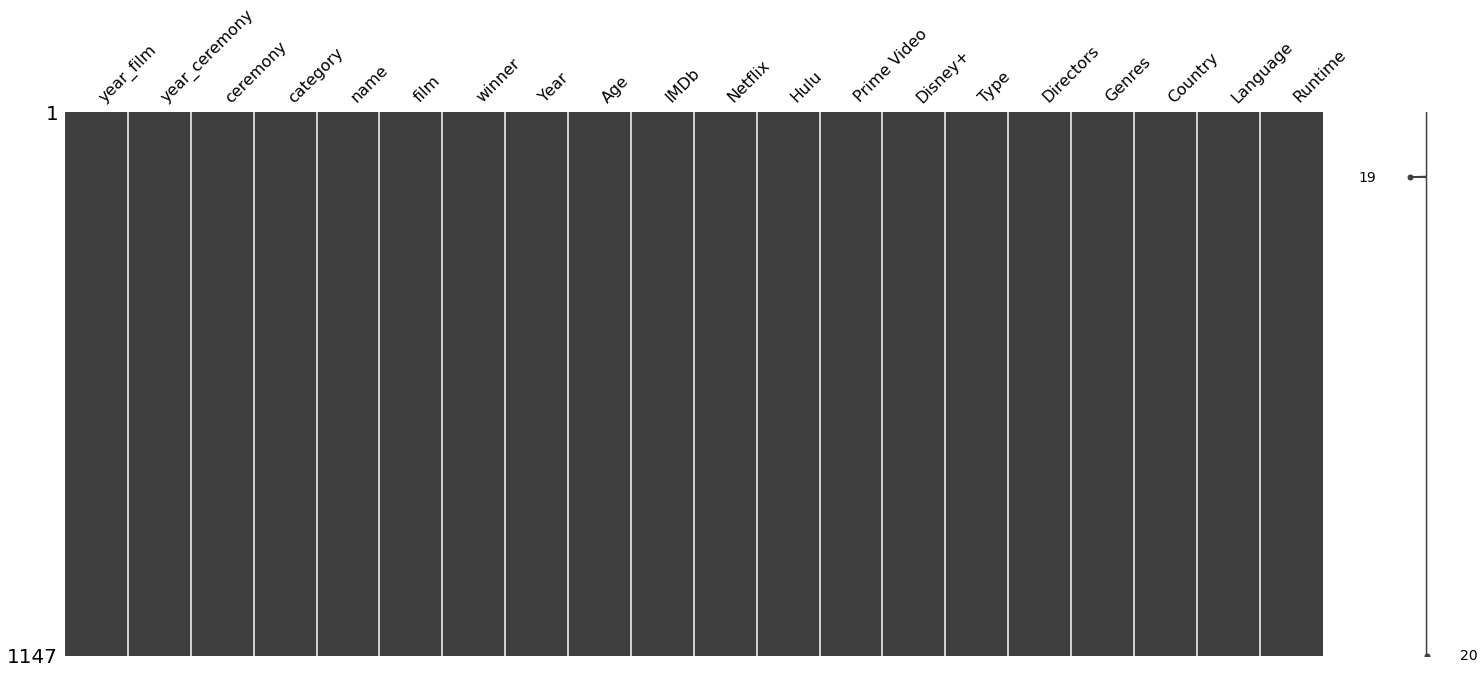

In [ ]:
msno.matrix(df)
plt.show()

Existem 2 bases com esse mesmo formato no Kaggle, uma é de filmes e a outra é de series. Para identificar se o titulo é um filme tem o tipo 0 e se ele é uma série o tipo é 1 como aqui nós só estamos trabalhando com a base de filmes, essa coluna não faz tem tanta importancia. 

In [ ]:
dfMovies["Type"].unique()

array([0])

In [ ]:
df.drop(columns=["Type"],inplace= True)


In [ ]:
df.loc[:,["winner"]] = df.loc[:,["winner"]].apply(lambda x: x.astype(int))



# **Análise Exploratória dos dados unidos**


A partir de agora faremos uma análise exploratória dos dados, para conhecer um pouco melhor a nossa base e as informações que podemos extrair dela antes de realizar realizar o processo de modelagem

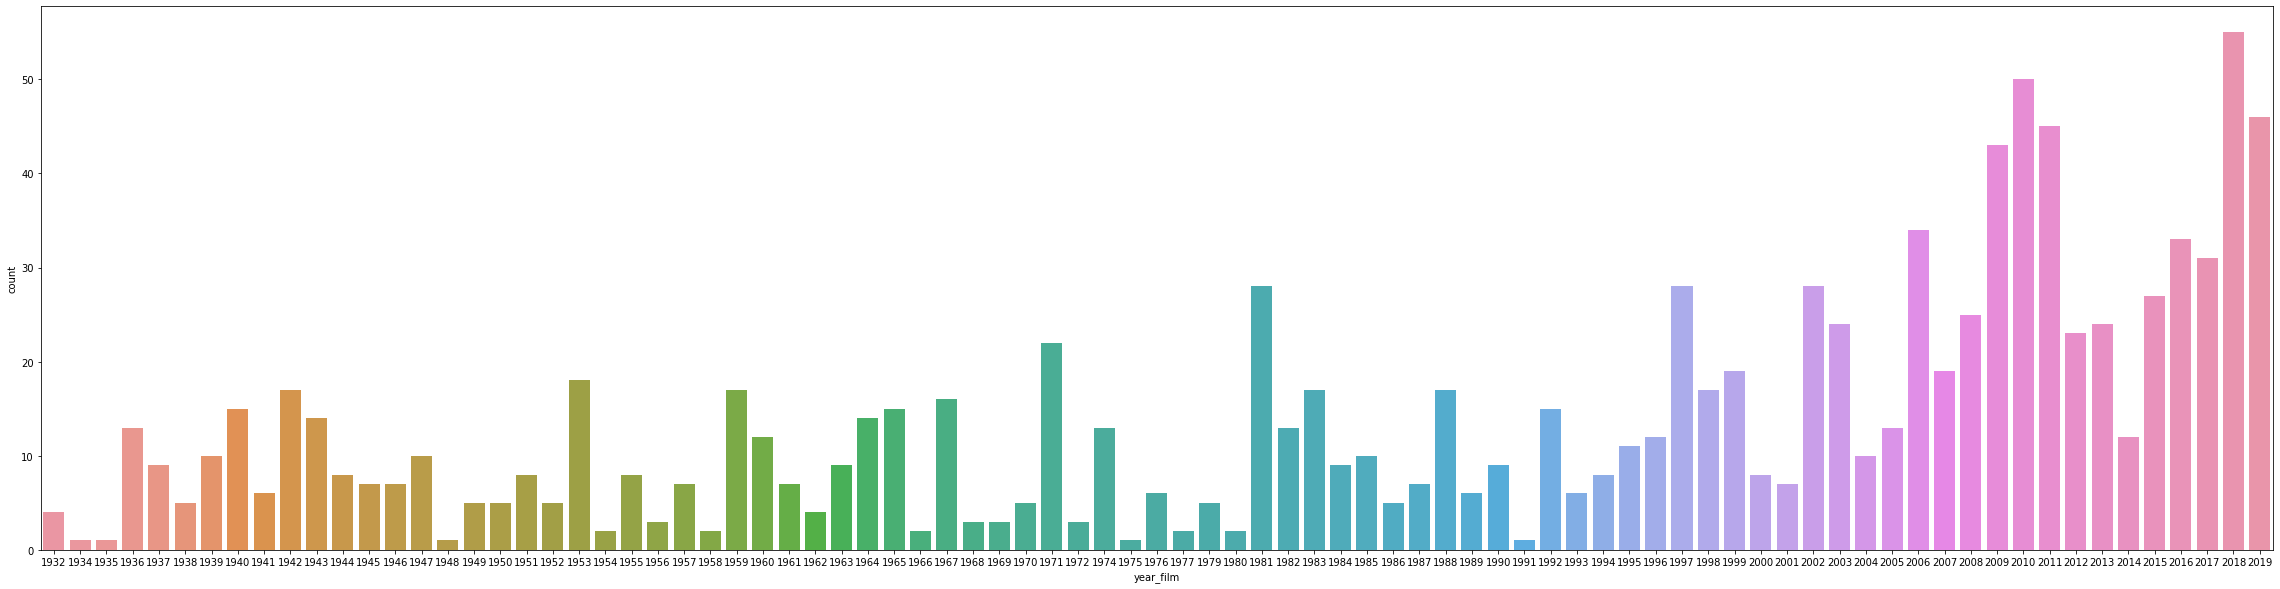

In [ ]:
plt.figure(figsize=(40,10))
sns.countplot(x="year_film", data=df,)
plt.show()

Aqui podemos ver que filmes com ano de lançamento mais recente aparecem com mais frequência que as mais antigas. A base de filmes(dfMovies) traz informações sobre filmes e quais plataformas de streaming ele está presente, como é de se imaginar que essas plataformas deem preferencia para filmes que interessem o público faz sentido que sejam os mais "recentes" a estarem no catálogo.

## Vencedores do Oscar

In [ ]:
#perdedores e vencedores do oscar
winner_count = df["winner"].value_counts()
winner_count

0    908
1    239
Name: winner, dtype: int64

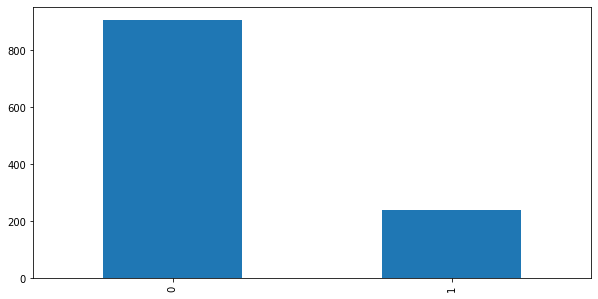

In [ ]:
plt.figure(figsize=(10,5))
winner_count.plot(kind = "bar")
plt.show()

Analisando o gráfico podemos ver que a proporção se mantem semelhante a da base antes de juntarmos ela. No total temos 239 ganhadores de 1147 indicações presentes na base


In [ ]:
vencedores = df[df["winner"]==True]
vencedores
topvencedors=vencedores["film"].value_counts()
topvencedors.index

Index(['Raiders of the Lost Ark', 'The Sound of Music', 'Hugo',
       'Terms of Endearment', 'In the Heat of the Night', 'The Artist',
       'Mary Poppins', 'Parasite', 'Inception', 'The Matrix',
       ...
       'To Catch a Thief', 'Silver Linings Playbook', 'Icarus', 'Holiday Inn',
       'Period. End of Sentence.', 'American Factory', 'The Full Monty',
       'The Hours', 'Amy', 'Inglourious Basterds'],
      dtype='object', length=142)

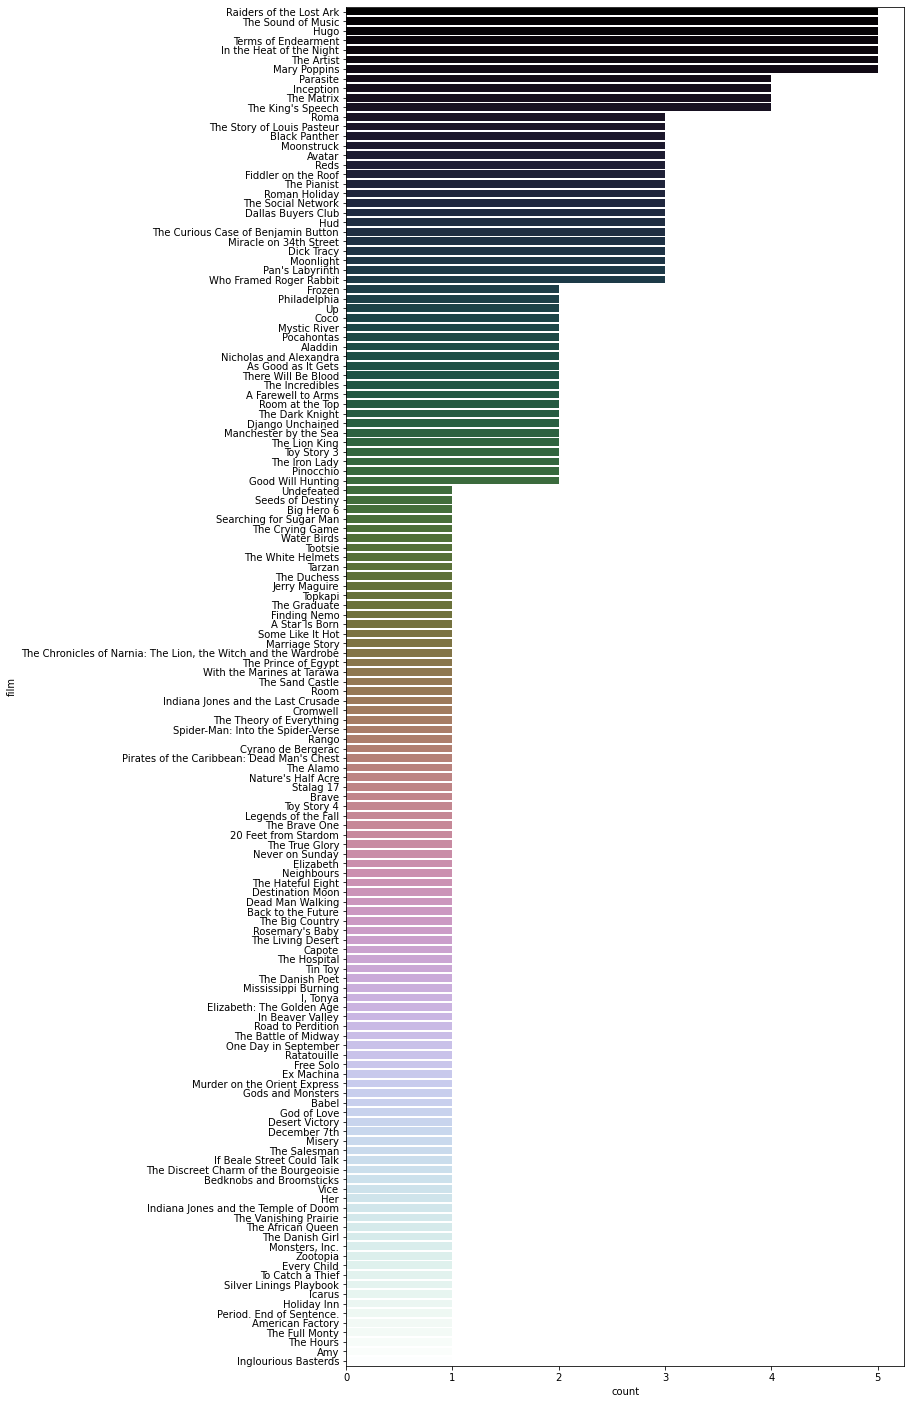

In [ ]:
plt.figure(figsize=(10,25))
sns.countplot(y="film", data=vencedores, order=topvencedors.index, palette="cubehelix")
plt.show()

## Indicados ao oscar

In [ ]:
indicacoes = df['film'].value_counts()
top10indicacoes= indicacoes.head(10)
top10indicacoes

Mary Poppins                           13
The Curious Case of Benjamin Button    13
The King's Speech                      12
Reds                                   12
Terms of Endearment                    11
Hugo                                   11
The Irishman                           10
Roma                                   10
The Artist                             10
True Grit                              10
Name: film, dtype: int64

In [ ]:
top10indicacoes.index

Index(['Mary Poppins', 'The Curious Case of Benjamin Button',
       'The King's Speech', 'Reds', 'Terms of Endearment', 'Hugo',
       'The Irishman', 'Roma', 'The Artist', 'True Grit'],
      dtype='object')

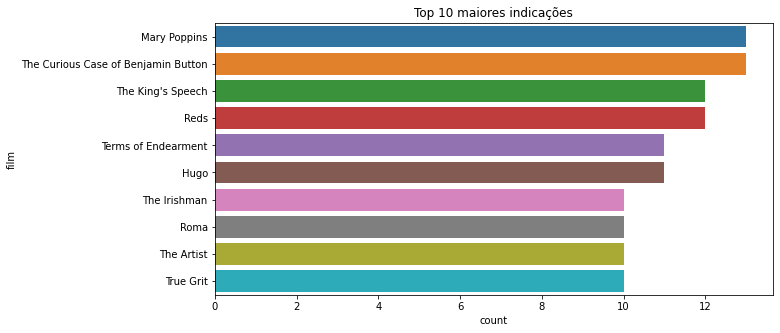

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y="film", data= df, order=top10indicacoes.index)
plt.title("Top 10 maiores indicações")
plt.show()

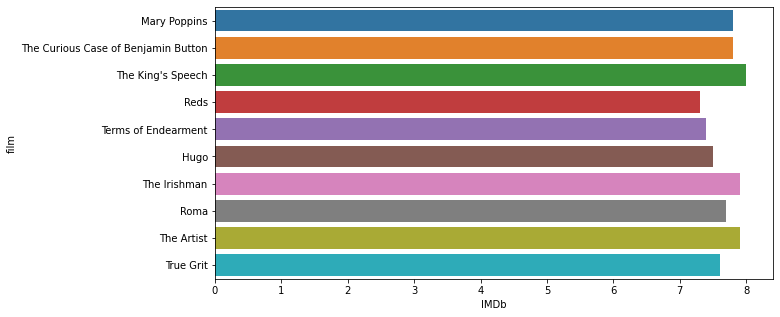

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y="film", x="IMDb", data=df, order = top10indicacoes.index)
plt.show()

O IMDb (Internet Movie Database) é um site que conta com uma grande quantidade de informações sobre filmes, desde trailers, horários de exibição no cinema, até criticas e avaliaçôes dos usuários. O site conta com mais de 250 milhôes de usuários e já ultrapassou 4 milhões de filmes, programas de TV e entretenimento. 

Fonte: 
[IMDb](https://help.imdb.com/article/imdb/general-information/what-is-imdb/G836CY29Z4SGNMK5?ref_=helpart_nav_1#)

No gráfico acima podemos visualizar a nota no IMDb dos 10 filmes com maior dunero de indicações presentes na base df. Podemos observar que esses filmes possuem notas altas no site, porém uma coisa interessante é que o número de indicações e as notas não tem o mesmo comportamento. 'The Curious Case of Benjamin Button' é o que ocupa o primeiro lugar na lista de mais indicados, mas sua nota é um pouco menor que 'Roman Holiday' que ocupa a nona posição da lista.




In [ ]:
imdb= df.sort_values(by="IMDb",ascending=False)
top10imdb=imdb.head(45)

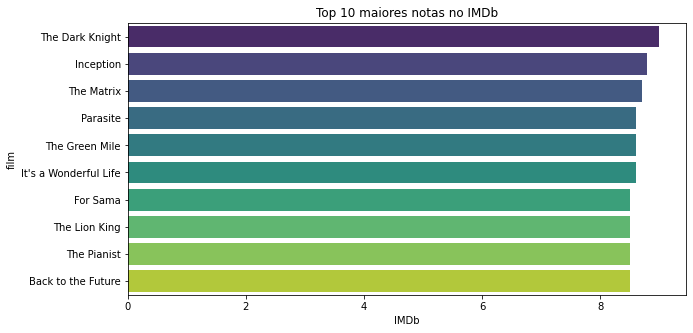

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y="film", x="IMDb",palette="viridis", data=top10imdb)
plt.title("Top 10 maiores notas no IMDb")
plt.show()


Aqui podemos ver que muitos dos filmes presentes na base que possuem notas mais altas do IMDb, são alguns dos mais populares na cultura pop. Como "Batman:The Dark Knight" que rendeu ao Heath Ledger o Oscar de melhor ator codjuvante pela sua interpretação como Coringa e "The Matrix" que levou quatro estatuetas entre elas a de melhor Efeitos Visuais. 

## Direção



In [ ]:
diretores = df["Directors"].value_counts()
direc10 = diretores.head(11)
direc10.index

Index(['-', 'Martin Scorsese', 'Steven Spielberg', 'David Fincher',
       'Warren Beatty', 'James L. Brooks', 'Ethan Coen,Joel Coen',
       'Tom Hooper', 'Christopher Nolan', 'Quentin Tarantino',
       'Paul Thomas Anderson'],
      dtype='object')

*Não tem a informação Directors na base, mas alguns foram indicados na categoria de melhor direção. Como verificar se o filme foi indicado a melhor diretor, pegar o nome do diretor e colocar na coluna "Directors"?*

In [ ]:
df.loc[df['category'] == 'DIRECTING', 'Directors'] = df.loc[df['category'] == 'DIRECTING', 'name']


In [ ]:
# 
df[df["Directors"]== "-"]

,year_film,year_ceremony,ceremony,category,name,film,winner,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
107,1945,1946,18,DOCUMENTARY (Short Subject),United States Marine Corps,To the Shores of Iwo Jima,0,1945,-,6.4,0,0,1,0,-,"Documentary,Short,War",United States,English,20.0
148,1952,1953,25,DOCUMENTARY (Short Subject),"Norman McLaren, Producer",Neighbours,1,1952,-,7.9,0,0,1,0,-,"Drama,Romance",Australia,English,22.0
149,1952,1953,25,SHORT SUBJECT (One-reel),"Norman McLaren, Producer",Neighbours,0,1952,-,7.9,0,0,1,0,-,"Drama,Romance",Australia,English,22.0
278,1967,1968,40,ACTOR,Rod Steiger,In the Heat of the Night,1,1967,13+,7.9,0,0,1,0,-,"Crime,Drama,Mystery,Thriller",United States,English,60.0
280,1967,1968,40,FILM EDITING,Hal Ashby,In the Heat of the Night,1,1967,13+,7.9,0,0,1,0,-,"Crime,Drama,Mystery,Thriller",United States,English,60.0
281,1967,1968,40,BEST PICTURE,"Walter Mirisch, Producer",In the Heat of the Night,1,1967,13+,7.9,0,0,1,0,-,"Crime,Drama,Mystery,Thriller",United States,English,60.0
282,1967,1968,40,SOUND,Samuel Goldwyn Studio Sound Department,In the Heat of the Night,1,1967,13+,7.9,0,0,1,0,-,"Crime,Drama,Mystery,Thriller",United States,English,60.0
283,1967,1968,40,SOUND EFFECTS,James A. Richard,In the Heat of the Night,0,1967,13+,7.9,0,0,1,0,-,"Crime,Drama,Mystery,Thriller",United States,English,60.0
284,1967,1968,40,WRITING (Screenplay--based on material from an...,Stirling Silliphant,In the Heat of the Night,1,1967,13+,7.9,0,0,1,0,-,"Crime,Drama,Mystery,Thriller",United States,English,60.0
336,1975,1976,48,FILM EDITING,"Fredric Steinkamp, Don Guidice",Three Days of the Condor,0,1975,18+,7.4,0,0,1,0,-,"Action,Drama,Thriller",United States,English,60.0


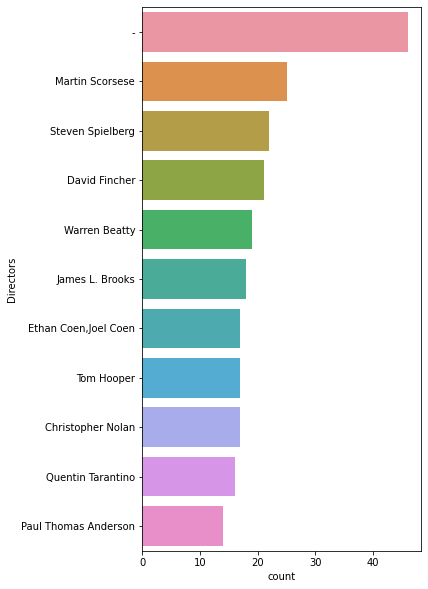

In [ ]:
plt.figure(figsize=(5,10))
sns.countplot(y="Directors", data = df, order = direc10.index)


## Genero


In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
gene = df["Genres"]
sergenero = gene.str.split(",")
sergenero

0                                   [Drama, Romance, War]
1                                   [Drama, Romance, War]
2                                   [Drama, Romance, War]
3                                   [Drama, Romance, War]
4                                        [Drama, Romance]
                              ...                        
1142                 [Action, Adventure, Fantasy, Sci-Fi]
1143                 [Action, Adventure, Fantasy, Sci-Fi]
1144    [Animation, Adventure, Comedy, Family, Fantasy...
1145                    [Animation, Short, Drama, Family]
1146                   [Action, Adventure, Drama, Sci-Fi]
Name: Genres, Length: 1147, dtype: object

In [ ]:
generos = pd.Series(sergenero)
generos

mlb = MultiLabelBinarizer()

columgen = pd.DataFrame(mlb.fit_transform(generos),columns= mlb.classes_, index=generos.index)
columgen


,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1143,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1144,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1145,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


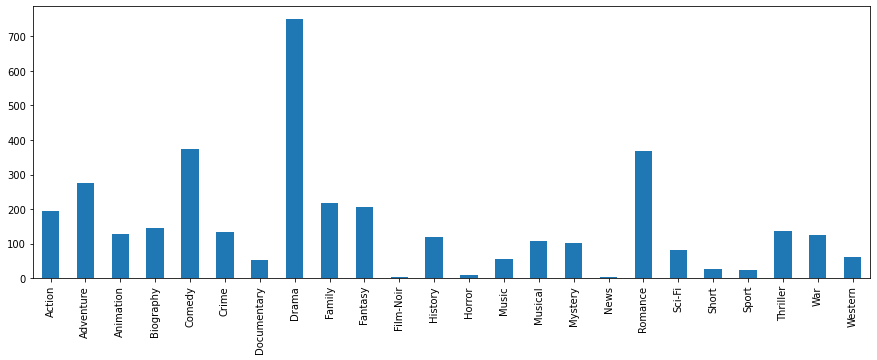

In [ ]:
contagemgenero = columgen.apply(pd.value_counts)
count = contagemgenero.loc[1]


plt.figure(figsize=(15,5))
count.plot(kind="bar",)
plt.show()

In [ ]:
#junta as duas bases
dataset = pd.concat([df, columgen], axis=1, sort = False)
dataset.head(10)

,year_film,year_ceremony,ceremony,category,name,film,winner,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1932,1933,6,ART DIRECTION,"Hans Dreier, Roland Anderson",A Farewell to Arms,0,1932,7+,6.5,0,0,1,0,Frank Borzage,"Drama,Romance,War",United States,English,80.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1932,1933,6,CINEMATOGRAPHY,"Charles Bryant Lang, Jr.",A Farewell to Arms,1,1932,7+,6.5,0,0,1,0,Frank Borzage,"Drama,Romance,War",United States,English,80.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1932,1933,6,OUTSTANDING PRODUCTION,Paramount,A Farewell to Arms,0,1932,7+,6.5,0,0,1,0,Frank Borzage,"Drama,Romance,War",United States,English,80.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1932,1933,6,SOUND RECORDING,"Paramount Studio Sound Department, Franklin B....",A Farewell to Arms,1,1932,7+,6.5,0,0,1,0,Frank Borzage,"Drama,Romance,War",United States,English,80.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1934,1935,7,ACTRESS,Bette Davis,Of Human Bondage,0,1934,-,7.2,0,0,1,0,John Cromwell,"Drama,Romance",United States,English,83.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,1935,1936,8,ACTRESS,Miriam Hopkins,Becky Sharp,0,1935,-,5.9,0,0,1,0,"Rouben Mamoulian,Lowell Sherman","Drama,Romance,War",United States,"English,French",84.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6,1936,1937,9,ACTOR,Paul Muni,The Story of Louis Pasteur,1,1936,-,7.3,0,0,1,0,William Dieterle,"Biography,Drama,History",United States,"English,French,Russian",86.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1936,1937,9,OUTSTANDING PRODUCTION,Cosmopolitan,The Story of Louis Pasteur,0,1936,-,7.3,0,0,1,0,William Dieterle,"Biography,Drama,History",United States,"English,French,Russian",86.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1936,1937,9,WRITING (Original Story),"Pierre Collings, Sheridan Gibney",The Story of Louis Pasteur,1,1936,-,7.3,0,0,1,0,William Dieterle,"Biography,Drama,History",United States,"English,French,Russian",86.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,1936,1937,9,WRITING (Screenplay),"Pierre Collings, Sheridan Gibney",The Story of Louis Pasteur,1,1936,-,7.3,0,0,1,0,William Dieterle,"Biography,Drama,History",United States,"English,French,Russian",86.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


A maioria dos filmes que já ganharam o Oscar de melhor filme são dramas o que demonstra uma certa preferencia da Academia por esse gênero em especifico.

In [ ]:
dataset.loc[:,["winner"]] = dataset.loc[:,["winner"]].apply(lambda x: x.astype(int))

In [ ]:
dataset.dropna(inplace = True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 0 to 1146
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year_film      1146 non-null   int64  
 1   year_ceremony  1146 non-null   int64  
 2   ceremony       1146 non-null   int64  
 3   category       1146 non-null   object 
 4   name           1146 non-null   object 
 5   film           1146 non-null   object 
 6   winner         1146 non-null   int64  
 7   Year           1146 non-null   int64  
 8   Age            1146 non-null   object 
 9   IMDb           1146 non-null   float64
 10  Netflix        1146 non-null   int64  
 11  Hulu           1146 non-null   int64  
 12  Prime Video    1146 non-null   int64  
 13  Disney+        1146 non-null   int64  
 14  Directors      1146 non-null   object 
 15  Genres         1146 non-null   object 
 16  Country        1146 non-null   object 
 17  Language       1146 non-null   object 
 18  Runtime 

## Categoria

## Correlação

In [ ]:
corr=df.corr()
corr

,year_film,year_ceremony,ceremony,winner,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime
year_film,1.000000,1.000000,0.999997,0.011369,1.000000,0.302889,0.473145,0.147891,-0.530025,0.061218,0.104557
year_ceremony,1.000000,1.000000,0.999997,0.011369,1.000000,0.302889,0.473145,0.147891,-0.530025,0.061218,0.104557
ceremony,0.999997,0.999997,1.000000,0.011470,0.999997,0.302780,0.473190,0.147887,-0.530028,0.061173,0.104453
winner,0.011369,0.011369,0.011470,1.000000,0.011369,0.168076,0.042177,-0.042495,-0.075980,0.084309,-0.044245
Year,1.000000,1.000000,0.999997,0.011369,1.000000,0.302889,0.473145,0.147891,-0.530025,0.061218,0.104557
IMDb,0.302889,0.302889,0.302780,0.168076,0.302889,1.000000,0.212452,0.113944,-0.313220,0.063993,0.234268
Netflix,0.473145,0.473145,0.473190,0.042177,0.473145,0.212452,1.000000,-0.235620,-0.546504,-0.308406,0.170294
Hulu,0.147891,0.147891,0.147887,-0.042495,0.147891,0.113944,-0.235620,1.000000,-0.078599,-0.160866,-0.041170
Prime Video,-0.530025,-0.530025,-0.530028,-0.075980,-0.530025,-0.313220,-0.546504,-0.078599,1.000000,-0.396331,-0.067927
Disney+,0.061218,0.061218,0.061173,0.084309,0.061218,0.063993,-0.308406,-0.160866,-0.396331,1.000000,-0.076861


In [ ]:
corr.style.background_gradient(cmap='rocket_r')

,year_film,year_ceremony,ceremony,winner,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime
year_film,1.000000,1.000000,0.999997,0.011369,1.000000,0.302889,0.473145,0.147891,-0.530025,0.061218,0.104557
year_ceremony,1.000000,1.000000,0.999997,0.011369,1.000000,0.302889,0.473145,0.147891,-0.530025,0.061218,0.104557
ceremony,0.999997,0.999997,1.000000,0.011470,0.999997,0.302780,0.473190,0.147887,-0.530028,0.061173,0.104453
winner,0.011369,0.011369,0.011470,1.000000,0.011369,0.168076,0.042177,-0.042495,-0.075980,0.084309,-0.044245
Year,1.000000,1.000000,0.999997,0.011369,1.000000,0.302889,0.473145,0.147891,-0.530025,0.061218,0.104557
IMDb,0.302889,0.302889,0.302780,0.168076,0.302889,1.000000,0.212452,0.113944,-0.313220,0.063993,0.234268
Netflix,0.473145,0.473145,0.473190,0.042177,0.473145,0.212452,1.000000,-0.235620,-0.546504,-0.308406,0.170294
Hulu,0.147891,0.147891,0.147887,-0.042495,0.147891,0.113944,-0.235620,1.000000,-0.078599,-0.160866,-0.041170
Prime Video,-0.530025,-0.530025,-0.530028,-0.075980,-0.530025,-0.313220,-0.546504,-0.078599,1.000000,-0.396331,-0.067927
Disney+,0.061218,0.061218,0.061173,0.084309,0.061218,0.063993,-0.308406,-0.160866,-0.396331,1.000000,-0.076861


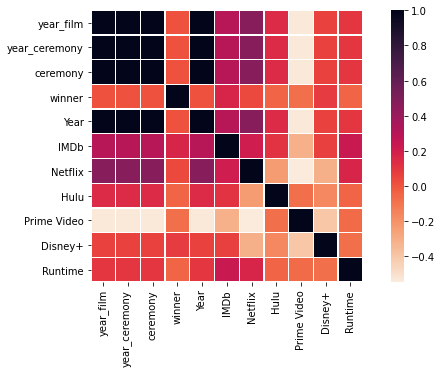

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr, cmap="rocket_r", linewidth=0.3, square=True)
plt.show()

### Correlação de genero

In [ ]:
gencorr = dataset.corr()
gencorr

,year_film,year_ceremony,ceremony,winner,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
year_film,1.000000,1.000000,0.999997,0.014021,1.000000,0.302889,0.472774,0.147570,-0.531910,0.064279,0.101741,0.145555,0.123381,0.153632,0.106011,-0.076734,0.075081,0.050671,0.014559,0.020534,0.089506,-0.072468,-0.001828,-0.003815,-0.116212,-0.139205,0.034857,0.049757,-0.259092,0.172686,0.003222,0.051780,0.067133,-0.113219,-0.023092
year_ceremony,1.000000,1.000000,0.999997,0.014021,1.000000,0.302889,0.472774,0.147570,-0.531910,0.064279,0.101741,0.145555,0.123381,0.153632,0.106011,-0.076734,0.075081,0.050671,0.014559,0.020534,0.089506,-0.072468,-0.001828,-0.003815,-0.116212,-0.139205,0.034857,0.049757,-0.259092,0.172686,0.003222,0.051780,0.067133,-0.113219,-0.023092
ceremony,0.999997,0.999997,1.000000,0.014123,0.999997,0.302780,0.472818,0.147565,-0.531914,0.064235,0.101635,0.145538,0.123342,0.153630,0.105991,-0.076852,0.075054,0.050657,0.014662,0.020475,0.089469,-0.072495,-0.001875,-0.003829,-0.116277,-0.139290,0.034825,0.049765,-0.258973,0.172700,0.003203,0.051777,0.067103,-0.112867,-0.023131
winner,0.014021,0.014021,0.014123,1.000000,0.014021,0.168076,0.043485,-0.041956,-0.074654,0.080970,-0.040392,-0.013134,0.000484,0.055874,0.055994,-0.026022,-0.012244,0.074425,-0.030575,0.092975,0.006824,-0.021407,0.010574,-0.024905,0.018124,0.014746,0.042187,-0.026229,-0.038820,0.001494,0.080904,0.022435,0.031633,-0.001152,-0.023764
Year,1.000000,1.000000,0.999997,0.014021,1.000000,0.302889,0.472774,0.147570,-0.531910,0.064279,0.101741,0.145555,0.123381,0.153632,0.106011,-0.076734,0.075081,0.050671,0.014559,0.020534,0.089506,-0.072468,-0.001828,-0.003815,-0.116212,-0.139205,0.034857,0.049757,-0.259092,0.172686,0.003222,0.051780,0.067133,-0.113219,-0.023092
IMDb,0.302889,0.302889,0.302780,0.168076,0.302889,1.000000,0.212452,0.113944,-0.313220,0.063993,0.234268,0.000340,-0.009710,0.038727,0.031583,-0.061309,0.067817,-0.026301,0.076429,0.039681,-0.004168,-0.042287,-0.081535,-0.048689,-0.092460,-0.080955,0.031943,0.019138,-0.103142,0.057962,-0.074739,0.008226,0.084761,-0.088905,-0.028541
Netflix,0.472774,0.472774,0.472818,0.043485,0.472774,0.212452,1.000000,-0.235913,-0.547353,-0.307746,0.169259,0.047286,-0.106622,-0.146224,0.171345,-0.121337,0.000939,-0.006956,0.179686,-0.170078,-0.078868,-0.030148,0.052273,-0.047873,-0.056174,-0.134963,-0.007924,-0.000942,-0.062551,0.052343,-0.060448,0.046578,0.048230,0.081734,-0.029097
Hulu,0.147570,0.147570,0.147565,-0.041956,0.147570,0.113944,-0.235913,1.000000,-0.078901,-0.160526,-0.042015,0.006024,-0.111367,-0.058534,-0.055020,0.024845,0.039961,0.040266,0.105343,-0.110633,-0.089617,-0.015021,-0.094645,0.025267,-0.079889,-0.095762,-0.045776,0.088935,-0.000390,-0.056275,-0.054737,0.049668,0.046247,-0.029834,0.186419
Prime Video,-0.531910,-0.531910,-0.531914,-0.074654,-0.531910,-0.313220,-0.547353,-0.078901,1.000000,-0.395633,-0.069907,-0.203498,-0.275405,-0.241974,-0.040610,0.001634,0.024530,0.014191,0.155737,-0.311204,-0.291258,0.048207,0.135389,0.032353,0.198147,-0.057853,-0.007519,-0.009935,0.162395,-0.191050,0.057274,-0.057107,0.036046,0.106542,0.104794
Disney+,0.064279,0.064279,0.064235,0.080970,0.064279,0.063993,-0.307746,-0.160526,-0.395633,1.000000,-0.072776,0.183945,0.555078,0.518122,-0.096400,0.121872,-0.113158,-0.047061,-0.446041,0.657740,0.493035,-0.019516,-0.158134,0.005170,-0.082303,0.291069,0.012538,-0.023912,-0.179593,0.226628,0.020627,-0.015521,-0.157193,-0.164047,-0.109709


In [ ]:
gencorr.style.background_gradient(cmap='crest')

,year_film,year_ceremony,ceremony,winner,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
year_film,1.000000,1.000000,0.999997,0.014021,1.000000,0.302889,0.472774,0.147570,-0.531910,0.064279,0.101741,0.145555,0.123381,0.153632,0.106011,-0.076734,0.075081,0.050671,0.014559,0.020534,0.089506,-0.072468,-0.001828,-0.003815,-0.116212,-0.139205,0.034857,0.049757,-0.259092,0.172686,0.003222,0.051780,0.067133,-0.113219,-0.023092
year_ceremony,1.000000,1.000000,0.999997,0.014021,1.000000,0.302889,0.472774,0.147570,-0.531910,0.064279,0.101741,0.145555,0.123381,0.153632,0.106011,-0.076734,0.075081,0.050671,0.014559,0.020534,0.089506,-0.072468,-0.001828,-0.003815,-0.116212,-0.139205,0.034857,0.049757,-0.259092,0.172686,0.003222,0.051780,0.067133,-0.113219,-0.023092
ceremony,0.999997,0.999997,1.000000,0.014123,0.999997,0.302780,0.472818,0.147565,-0.531914,0.064235,0.101635,0.145538,0.123342,0.153630,0.105991,-0.076852,0.075054,0.050657,0.014662,0.020475,0.089469,-0.072495,-0.001875,-0.003829,-0.116277,-0.139290,0.034825,0.049765,-0.258973,0.172700,0.003203,0.051777,0.067103,-0.112867,-0.023131
winner,0.014021,0.014021,0.014123,1.000000,0.014021,0.168076,0.043485,-0.041956,-0.074654,0.080970,-0.040392,-0.013134,0.000484,0.055874,0.055994,-0.026022,-0.012244,0.074425,-0.030575,0.092975,0.006824,-0.021407,0.010574,-0.024905,0.018124,0.014746,0.042187,-0.026229,-0.038820,0.001494,0.080904,0.022435,0.031633,-0.001152,-0.023764
Year,1.000000,1.000000,0.999997,0.014021,1.000000,0.302889,0.472774,0.147570,-0.531910,0.064279,0.101741,0.145555,0.123381,0.153632,0.106011,-0.076734,0.075081,0.050671,0.014559,0.020534,0.089506,-0.072468,-0.001828,-0.003815,-0.116212,-0.139205,0.034857,0.049757,-0.259092,0.172686,0.003222,0.051780,0.067133,-0.113219,-0.023092
IMDb,0.302889,0.302889,0.302780,0.168076,0.302889,1.000000,0.212452,0.113944,-0.313220,0.063993,0.234268,0.000340,-0.009710,0.038727,0.031583,-0.061309,0.067817,-0.026301,0.076429,0.039681,-0.004168,-0.042287,-0.081535,-0.048689,-0.092460,-0.080955,0.031943,0.019138,-0.103142,0.057962,-0.074739,0.008226,0.084761,-0.088905,-0.028541
Netflix,0.472774,0.472774,0.472818,0.043485,0.472774,0.212452,1.000000,-0.235913,-0.547353,-0.307746,0.169259,0.047286,-0.106622,-0.146224,0.171345,-0.121337,0.000939,-0.006956,0.179686,-0.170078,-0.078868,-0.030148,0.052273,-0.047873,-0.056174,-0.134963,-0.007924,-0.000942,-0.062551,0.052343,-0.060448,0.046578,0.048230,0.081734,-0.029097
Hulu,0.147570,0.147570,0.147565,-0.041956,0.147570,0.113944,-0.235913,1.000000,-0.078901,-0.160526,-0.042015,0.006024,-0.111367,-0.058534,-0.055020,0.024845,0.039961,0.040266,0.105343,-0.110633,-0.089617,-0.015021,-0.094645,0.025267,-0.079889,-0.095762,-0.045776,0.088935,-0.000390,-0.056275,-0.054737,0.049668,0.046247,-0.029834,0.186419
Prime Video,-0.531910,-0.531910,-0.531914,-0.074654,-0.531910,-0.313220,-0.547353,-0.078901,1.000000,-0.395633,-0.069907,-0.203498,-0.275405,-0.241974,-0.040610,0.001634,0.024530,0.014191,0.155737,-0.311204,-0.291258,0.048207,0.135389,0.032353,0.198147,-0.057853,-0.007519,-0.009935,0.162395,-0.191050,0.057274,-0.057107,0.036046,0.106542,0.104794
Disney+,0.064279,0.064279,0.064235,0.080970,0.064279,0.063993,-0.307746,-0.160526,-0.395633,1.000000,-0.072776,0.183945,0.555078,0.518122,-0.096400,0.121872,-0.113158,-0.047061,-0.446041,0.657740,0.493035,-0.019516,-0.158134,0.005170,-0.082303,0.291069,0.012538,-0.023912,-0.179593,0.226628,0.020627,-0.015521,-0.157193,-0.164047,-0.109709


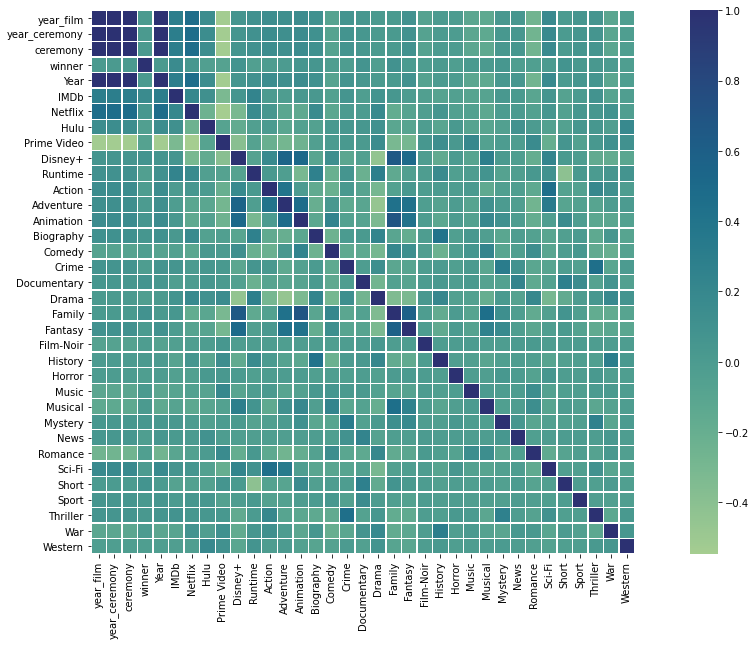

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(gencorr, cmap="crest", linewidth=0.3, square=True)
plt.show()

### Correlação apenas filmes

In [ ]:
filmes = df[df["category"]=="BEST PICTURE"]
filmes.shape

(59, 19)

In [ ]:
filmescorr= filmes.corr()
filmescorr
filmescorr.style.background_gradient(cmap='rocket_r')

,year_film,year_ceremony,ceremony,winner,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime
year_film,1.000000,1.000000,1.000000,-0.110035,1.000000,0.038047,0.385449,0.032043,-0.294207,-0.101403,-0.164051
year_ceremony,1.000000,1.000000,1.000000,-0.110035,1.000000,0.038047,0.385449,0.032043,-0.294207,-0.101403,-0.164051
ceremony,1.000000,1.000000,1.000000,-0.110035,1.000000,0.038047,0.385449,0.032043,-0.294207,-0.101403,-0.164051
winner,-0.110035,-0.110035,-0.110035,1.000000,-0.110035,0.096239,-0.083809,0.007785,0.113770,0.049967,-0.071403
Year,1.000000,1.000000,1.000000,-0.110035,1.000000,0.038047,0.385449,0.032043,-0.294207,-0.101403,-0.164051
IMDb,0.038047,0.038047,0.038047,0.096239,0.038047,1.000000,0.121530,0.082188,-0.173808,0.099600,0.226817
Netflix,0.385449,0.385449,0.385449,-0.083809,0.385449,0.121530,1.000000,-0.431174,-0.617498,-0.366295,0.136532
Hulu,0.032043,0.032043,0.032043,0.007785,0.032043,0.082188,-0.431174,1.000000,0.075963,-0.133259,-0.151436
Prime Video,-0.294207,-0.294207,-0.294207,0.113770,-0.294207,-0.173808,-0.617498,0.075963,1.000000,-0.214061,0.054417
Disney+,-0.101403,-0.101403,-0.101403,0.049967,-0.101403,0.099600,-0.366295,-0.133259,-0.214061,1.000000,-0.130680


# Próximos passos

*   Construir um modelo para os dados análisados
*   Fazer uma análise exploratória das bases Oscar e Movies separadamente
*   Testar novamente com uma base do IMDB


